# ⚡ Bootcamp Grupo 6 - UTEC  BID 4Geeks Mayo-Agosto 2022 ⚡
# *PROYECTO FINAL*

 
*   Bentancor, Germán 
*   Marfurt, Ana 
*   Salvático, Sandra


# Stroke Prediction 

## Pip Install

In [ ]:
!pip install --upgrade pip
!pip install pandas numpy seaborn plotly
!pip install sklearn
!pip install statsmodels
!pip install imblearn
!pip install pygal
!pip install autoviz
!pip install missingno
!pip install pywaffle
%matplotlib inline
!pip install lightgbm

## Introduction

Stroke happens when the blood supply to part of the brain is cut off. Without blood, brain cells can be damaged or die. Fast access to treatment saves lives and improves recovery.

There are many factors, including tobacco use, physical inactivity, unhealthy diet, harmful use of alcohol, atrial fibrillation, raised blood lipid levels, obesity, genetic disposition, stress and depression.

Stroke has already reached epidemic proportions. 1 in 4 of us will have a stroke in our lifetime. 

Ref: [1] https://www.world-stroke.org/
[1.1]
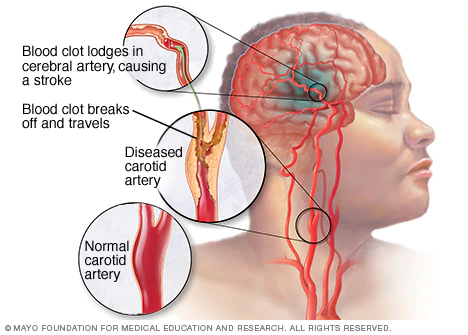


Stroke, a cerebrovascular disease, is one of the major causes of death. It causes significant health and financial burdens for both patients and health care systems. One of the important risk factors for stroke is health-related behavior, which is becoming an increasingly important focus of prevention. Many machine learning models have been built to predict the risk of stroke or to automatically diagnose stroke, using predictors such as lifestyle factors or radiological imaging.
[2] (Alanazi EM, Abdou A, Luo J. Predicting Risk of Stroke From Lab Tests Using Machine Learning Algorithms: Development and Evaluation of Prediction Models).
[3](JMIR Form Res. 2021 Dec 2;5(12):e23440. doi: 10.2196/23440. PMID: 34860663; PMCID: PMC8686476.)

**In Uruguay**, stroke has a fundamental epidemiological importance: it is among the three leading causes of death at a general level and it is the leading cause of disability in adults. According to data published by the Commission for Cardiovascular Health, around 80 million people living in the world today have suffered a stroke and, consequently, more than 50 million survivors live with some type of permanent disability. Although life after a stroke is not the same in many cases, it is possible, with the right care and support, to continue with a good quality of life. CVAs are time-dependent, which means that it is essential to identify them as quickly as possible in order to establish the most appropriate treatment for the patient and prevent possible sequelae; they constitute one of the leading causes of disease burden worldwide and in Uruguay, measured in years of healthy life lost, an indicator that encompasses both mortality and disability caused by these diseases.

According to the latest data from the Ministry of Public Health, from December 2019, during 2018, 1,732 people died from stroke and 2,125 people from cerebrovascular causes in general. [4] (https://um.edu.uy/noticias/el-acv-es-una-enfermedad-con-alta-incidencia-en-uruguay-y-el-mundo)


**Models can predict risk with high accuracy while maintaining a reasonable false positive rate.**

Stroke is the second leading cause of death worldwide. According to the World Health Organization [5], 5 million people worldwide suffer a stroke every year. Of these, one third die and another third are left permanently disabled. In the United States, someone has a stroke every 40 seconds and every four minutes, someone dies [6]. The aftermath is devastating, with victims experiencing a wide range of disabling symptoms including sudden paralysis, speech loss or blindness due to blood flow interruption in the brain [7]. The economic burden to the healthcare system in the United States amounts to about $34 billion per year in the US [8]. An additional $40 per year is spend on care for elderly stroke survivors [9]. 



### **Problem Statement**

Study the relationships of several variables and Stroke and  predict the stroke probability with best model and hypertuned parameters.

*Our proyect  it's about make an aplication to screen healthy patients to know the degree of probability of suffering a stroke or not suffering it  to have more tools to design a personalized prevention plan for doctors.*


Hypothesis

- Does age has impact on strokes? 

- Does body mass index and glucose levels in a person propel a stroke?

Assumption
 
- Smoking can induce Stroke, is it true? 

- Have Heart Disease is prone to Stroke, is it true? 

- Hypertensión could lead to Stroke, is it true? 

### Metadata
- id: unique identifier
- gender: "Male", "Female" or "Other"
- age: age of the patient
- hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- ever_married: "No" or "Yes"
- work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- Residence_type: "Rural" or "Urban"
- avg_glucose_level: average glucose level in blood
- bmi: body mass index
- smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
- stroke: 1 if the patient had a stroke or 0 if not


**Studying the data dictionary our first conclusions is:
Contains some of the preconditions recognized worldwide as causes of the disease. Others feature aren't in the dataset.**

## Step 0. Import Libraries and modules

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import math
import warnings 
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, 
                             auc, 
                             precision_score,
                             recall_score,
                             f1_score, 
                             roc_auc_score, RocCurveDisplay, roc_curve,
                             confusion_matrix, classification_report)

from imblearn.under_sampling import NearMiss
from collections import Counter

from imblearn.over_sampling import RandomOverSampler

from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
 

In [ ]:
sns.set(rc={'figure.figsize': (8, 6)})
#splt.style.use('fivethirtyeight')

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
#funtion to add percentage to bar graph
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        #total = feature.value_counts().values[i]
        total=0
        for j in range(hue_categories):
            if not math.isnan(a[(j*Number_of_categories + i)]):
              total= total + a[(j*Number_of_categories + i)]

        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() + 0.1
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height() + 0.1
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

In [ ]:
#We define function to display the results of model
LABELS1={"No Stroke","Stroke"}
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(4, 4))
    sns.heatmap(conf_matrix, xticklabels=LABELS1, yticklabels=LABELS1, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y,zero_division=False))

## Step 1. Load the dataset
The information was downloaded from the Kaggle site.
 [10]https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset because we did not find Uruguayan public data about stroke.

In [ ]:
df_raw = pd.read_csv('../data/raw/healthcare-dataset-stroke-data.csv')

In [ ]:
"""from google.colab import drive
drive.mount('/content/drive')"""

In [ ]:
"""#usamos este en el drive compartido
df_raw = pd.read_csv('/content/drive/MyDrive/4geeks/Proyecto/colab/Copia de healthcare-dataset-stroke-data.csv')"""

In [ ]:
#usamos este en el drive compartido
#df_raw = pd.read_csv('/content/drive/MyDrive/4geeks/Proyecto/colab/healthcare-dataset-stroke-data.csv')

### 1.1 Get basic info

In [ ]:
df_raw.info()

**Studie duplicates**

In [ ]:
df_raw['id'].duplicated().sum()

Theres is not duplicated observation. The id should be the index of dataframe

## Initial Insights About Dataset

- We have 12 columns with 5110 observations.
- There are  categorical and numerical features.

    Categorical Features: gender, ever_married, work_type, Residence_type, smoking_status

    Binary Numerical Features: hypertension,heart_disease, stroke
    
    Continous Numerical Features: age, avg_glucose_level, bmi

- Missing value in bmi.
- There are not duplicates observations.

## 1.2 Take a sample

In [ ]:
df_raw.sample(10)

## 1.3 Transform if needed

In [ ]:
#Change the object variable to category
df_raw['gender'] = df_raw['gender'].astype('category')
df_raw['ever_married'] = df_raw['ever_married'].astype('category')
df_raw['work_type'] = df_raw['work_type'].astype('category')
df_raw['Residence_type'] = df_raw['Residence_type'].astype('category')
df_raw['smoking_status'] = df_raw['smoking_status'].astype('category')
df_raw['hypertension'] = df_raw['hypertension'].astype('category')
df_raw['heart_disease'] = df_raw['heart_disease'].astype('category')
df_raw['stroke'] = df_raw['stroke'].astype('category')

#Set Index
df_raw = df_raw.set_index(['id']) 
 

In this dataset, there are 3 numerical attributes, age, average glucose level and bmi. Let’s normalize them to ensure that they have equal weightage when building a classifier. Noted that new columns were created rather than replacing the initial columns. This preserved the original data.

## Step 2. Make a basic EDA

### 2.1 Get basic info

In [ ]:
print("The shape of the data is:" + str(df_raw.shape))


In [ ]:
df_raw.info()

### 2.2 Describe the numerical variables

In [ ]:
df_raw.describe()

Age: The average age  is 43 in the dataset. We must study the age distribution. We have read that most studies are carried out on populations > 35 years. **We can see that we have an older adult population bias.** 

Hypertension and Heart desease: Most observation  do not have deviations in Hypertension and heart_disease. The average of hypertension column and heart_disease column is significantly lower than 0.5 (average of 0,1). That means that hardly any of the patients suffer from those in the our dataset.

Average Glucose: The  level is around 100 which can be considered healthy as well.
75% Glucose values ​​on average are within the normal range, however we have high maximum values (271 mg/dl). 

BMI: There are some Null values in the bmi column. **Regarding bmi values, we can conclude that we have a mostly obese population, which could lead us to biased information.**

Stroke: Has 1 as its max value and 0 as its min, 25th, 50th, and 75th percentile value. That means, mostly all the values in the column are 0.

**Age**

In [ ]:
df_raw.age.hist()
plt.show()

In [ ]:
#create bins to obtain a better description of the age observation
df_raw['age_cat'] = pd.cut(df_raw['age'], bins = [0,13,21, 45,65,75,105], labels = ['Children', 'Teens', 'Adults','Mid Adults','Elderly','Elderly older adults'])

In [ ]:
print(df_raw['age_cat'].value_counts())
sns.set(rc={'figure.figsize':(15,8)})
seaborn_plot = sns.countplot(df_raw['age_cat'])
seaborn_plot.set_xlabel("Age Category",fontsize=20)
seaborn_plot.set_ylabel("Count",fontsize=20)

**Note:** 
The dataset have more adults and mid adults observations than the other. The mean is 45 years-old.

***avg_glocose_level***
Glycemia is the concentration of glucose or sugar in the blood, coming from food, especially carbohydrates. "average glucose" is a way of translating A1C test results into terms that closely represent daily glucose readings. It was introduced by the American Diabetes Association (ADA) in 2010 to help people with diabetes better understand how their A1C results compare to their daily glucose readings.[11]

The eAG is determined using a straightforward mathematical formula that converts percentage of glycated hemoglobin as determined by an A1C test into the unit you're used to seeing on your glucometer: mg/dL: 28.7 X A1C – 46.7 = eAG.[12]



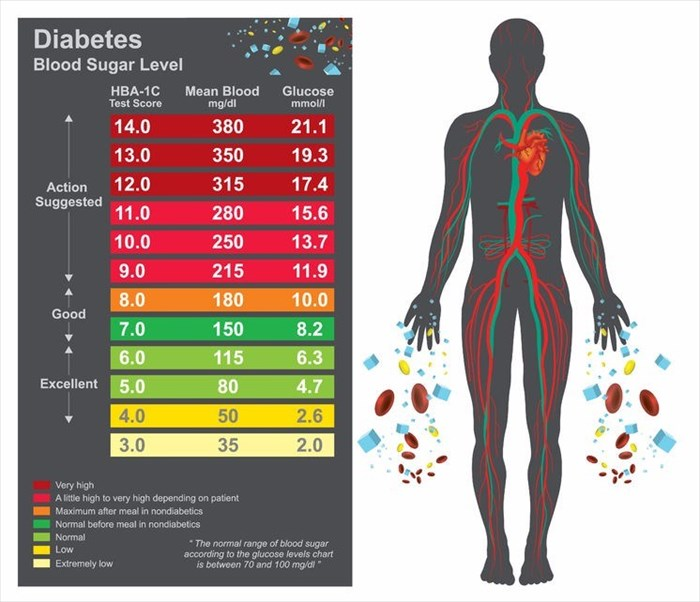

[13]

In [ ]:
#Explored the glucose level 
plt.figure(figsize=(8, 6))
ax = sns.histplot(data=df_raw, x="avg_glucose_level")
plt.xlabel("Average Glucose Level", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.title('Average Glucose')
plt.show()

In [ ]:
df_raw['avg_cat'] = pd.cut(df_raw['avg_glucose_level'], bins = [35,50, 80,180,215,400], labels = ['Ext Low', 'Low', 'Normal','Height','Very Height'])

In [ ]:
print(df_raw['avg_cat'].value_counts())
sns.set(rc={'figure.figsize':(15,8)})
seaborn_plot = sns.countplot(df_raw['avg_cat'])
seaborn_plot.set_xlabel("Avg Glucose Level",fontsize=20)
seaborn_plot.set_ylabel("Count",fontsize=20)

**Note:** 
The dataset have a normal values of Avg Glucose Level in the most observation.
The min values is inside range. The max value will be studie for posible outlier.



**Body mass index (BMI)** is a person's weight in kilograms divided by the square of height in meters. BMI is an easy and inexpensive screening method for weight category: underweight, healthy weight, overweight, and obesity. The bmi is a parameter that is widely used to assess the nutritional status of a person, since it correlates 80% with body fat and, together with other anthropometric measurements, can bring us closer to the diagnosis of overweight or obesity.[14]

It is known that in adults the normal or healthy BMI is between 18 and 25, however, these normal values ​​can vary over the years. Therefore, below we present a table where the normality of the BMI according to age is presented.

The formula we use to calculate BMI is: m/l². Take your current weight measured in kilograms and divide by the square root of your height in meters. In addition, our body mass index calculator incorporates the factors of gender and age.

[15][16]

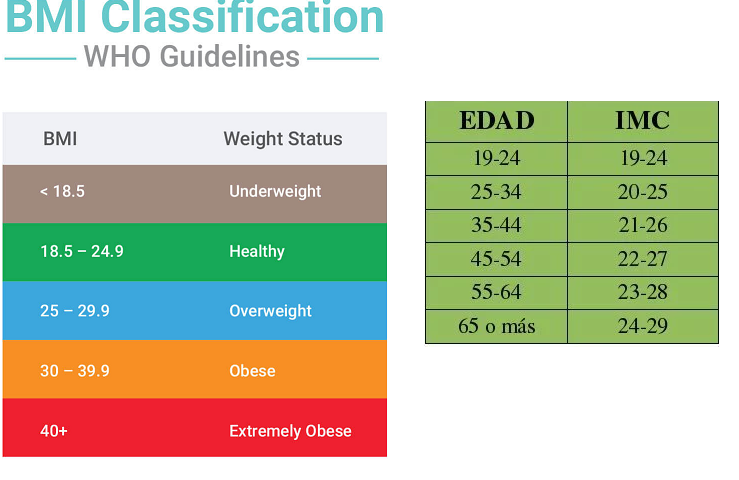

In [ ]:
# Distribution of bmi
plt.figure(figsize=(8, 6))
ax = sns.histplot(data=df_raw, x="bmi")
plt.xlabel("BMI", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.title('BMI')
plt.show()

**Note:**
50% of patient observation have overweight. The mean is 28,1

In [ ]:
df_raw['bmi_cat'] = pd.cut(df_raw['bmi'], bins = [0,18, 25,30,40,70], labels = ['underweight', 'healthy', 'overweight','obese','extremely obese'])

In [ ]:
ax=sns.countplot(x='bmi_cat', data=df_raw)
plt.title('Distribution of BMI by Category')
plt.xlabel("BMI Category", fontsize = 11)
without_hue(ax,df_raw.bmi_cat)

### 2.3 Describe the categorical variables

**Stroke** See amount of value of our target

In [ ]:
df_raw['stroke'].value_counts()

In [ ]:
ax=sns.countplot(x=df_raw['stroke'])
plt.title('Distribution of stroke')
without_hue(ax,df_raw['stroke'])

**Note: We  have a highly unbalanced data distribution**

      From distribution it is clear that every 5 patient out of 100 patient are  stroke +.

In the Health area where usually find data sets with thousands of records with “negative” patients and a few positive cases, that is, those who suffer from the disease we want to classify.

  There are several strategies for working with unbalanced datasets that we will discuss later.

**Gender**

In [ ]:
ax=sns.countplot(x='gender', data=df_raw)
plt.title('Distribution of Gender')
without_hue(ax,df_raw.gender)

***Residence_Type***  

1.   Urban
2.   Rural

In [ ]:
df_raw['Residence_type'].value_counts()

In [ ]:
ax=sns.countplot(x=df_raw['Residence_type'])
plt.title('Distribution of Residence')
without_hue(ax,df_raw)

It is similar amount in both Residence_type

***Ever_married***

*   Yes
*   No

In [ ]:
df_raw['ever_married'].value_counts()

In [ ]:
ax=sns.countplot(x='ever_married', data=df_raw)
plt.title('Distribution of Marital State')
without_hue(ax,df_raw.ever_married)

Most of the patients are married in our dataset, also have more adult than other category of age.

**Work_Type**

- Private
- Govt_job
- Self-employed
- children
- Never_worked

In [ ]:
df_raw['work_type'].value_counts()

In [ ]:
ax=sns.countplot(x=df_raw['work_type'])
plt.title('Distribution of Work Type')
without_hue(ax,df_raw)

We have a noticeable majority of private workers over the others work_type. The children type is relation of the children patients so is the same as never worked.

***smoking_status***
 * never_smoked
 * fromerly smoked
 * smokes
 * Unknown


    "formerly smoked": An adult who has smoked in his or her lifetime but who had quit smoking at the time of interview.
    "Unknown": not have data about this patients

In [ ]:
df_raw['smoking_status'].value_counts()

**Note:** 
the most observations never smoked

In [ ]:
ax=sns.countplot(x=df_raw['smoking_status'])
plt.title('Distribution of Smoking_status')
without_hue(ax,df_raw)

***hypertension***

Blood pressure is the force exerted by circulating blood against the walls of the body’s arteries that was the major blood vessels in the body. Hypertension is when blood pressure is too high.


In [ ]:
ax=sns.countplot(x=df_raw['hypertension'])
plt.title('Distribution of Hypertension')
without_hue(ax,df_raw)

**Note:**
Most observations are non-hypertensive


**Heart Disease**


*   Yes
*   No

In [ ]:
ax=sns.countplot(x=df_raw['heart_disease'])
plt.title('Distribution of Heart Disease')
without_hue(ax,df_raw)

**Note:**
Most observations are non present heart disease

## 2.4 Missing Values and Outliers

In [ ]:
#Check for the missing value in all variable
df_raw.isnull().sum().to_frame(name="Missing values").sort_values(by="Missing values", ascending=False).style.background_gradient(cmap='Reds')

**Showing records where patient suffered from stroke but had missing value in bmi attribute.**

In [ ]:
df_raw[(df_raw['bmi'].isna()) & (df_raw['stroke'] == 1)].shape

The dataset have 201 records were listed as NaN (not a number) in the BMI column. The first thought was to remove them since they represented a small fraction of the dataset. Nevertheless, by probing further, it contained 40 records where patients suffered a stroke. This information was valuable considering the fact that only 249 patients suffered a stroke in all dataset.

According to the documentation found, the bmi is related to age. So create a bins to create a inputer algorithm.


In [ ]:
# The labels of bins
labels = ['0 - 4','5 - 9','10 - 19','20 - 29', '30 - 39', '40 - 49', '50 - 59','60 - 69', '70 - +']

# Define the ages between bins
bins = [0,5,10,20,30,40, 50, 60, 70, np.inf]

# pd.cut each column, with each bin closed on left and open on right
df_raw['age_bins'] = pd.cut(df_raw['age'], bins=bins, labels=labels, right=False)

Create a new column with the mean value depend of age and gender

In [ ]:
df_raw['bmi_new'] = df_raw.groupby(["age_bins","gender"])['bmi'].transform(lambda x: x.fillna(x.mean()))
df_raw[df_raw['bmi'].isna()].sample(5)

In [ ]:
df_raw.groupby(["age_bins","gender"]).mean()

In [ ]:
#Set the value of missing value
df_raw['bmi'].fillna(df_raw['bmi_new'], inplace = True)

In [ ]:
df_fem = df_raw[df_raw["gender"]=="Female"]

plt.figure(figsize = (15, 8))
sns.boxplot( y = df_fem.age_bins, x = df_fem.bmi,  orient = 'h', showfliers = False, palette = 'gist_heat')
plt.ylabel('Age') 
plt.title('BMI - Female by Age')
plt.show()

In [ ]:
df_male = df_raw[df_raw["gender"]=="Male"]

plt.figure(figsize = (15, 8))
sns.boxplot( y = df_male.age_bins, x = df_male.bmi,  orient = 'h', showfliers = False, palette = 'gist_heat')
plt.ylabel('Age') 
plt.title('BMI - Male by Age')
plt.show()

**Note** 
In this graph observe that the behavior of the age/bmi ranges increase but start decrease the Elderly step.

In [ ]:
plt.figure(figsize = (8, 4))
plt.scatter(x=df_raw['bmi'], y=df_raw['age'])
plt.ylabel('Age')
plt.xlabel('BMI')
plt.show() 

**Note**
In this graph show posible outlier points in the BMI

In [ ]:
df_raw[df_raw['bmi']>80].sort_values(by=['bmi'])

**Remove the 2 outliers because they are very far from the neighbours**


In [ ]:
#Remove 2 outliers
df_raw.drop(df_raw[(df_raw['bmi'] > 80)].index, inplace=True)

## 2.6 Perform bivariate analysis

In [ ]:
conts = ['age','avg_glucose_level','bmi']

In [ ]:
background_color = "#fafafa"
fig = plt.figure(figsize=(12, 12), dpi=100,facecolor=background_color)
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.1, hspace=0.4)


plot = 0
for row in range(0, 1):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].set_facecolor(background_color)
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        for s in ["top","right","left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1

plot = 0

s = df_raw[df_raw['stroke'] == 1]
ns = df_raw[df_raw['stroke'] == 0]
 
for feature in conts:
        sns.kdeplot(s[feature], ax=locals()["ax"+str(plot)], color='red', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        sns.kdeplot(ns[feature],ax=locals()["ax"+str(plot)], color='blue', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        plot += 1

ax0.set_xlabel('Age')
ax1.set_xlabel('Avg. Glucose Levels')
ax2.set_xlabel('BMI') 

        
ax0.text(-20, 0.056, 'Numeric Variables by Stroke & No Stroke', fontsize=20, fontweight='bold', fontfamily='serif')

plt.show()

**the distribution of age  is different for those that have strokes, and those that do not.**
The others numerical variables have the same distribution.


In [ ]:
#Checking correlation between age and target:
plt.figure(figsize = (8, 4))
sns.boxplot(y = df_raw.stroke, x = df_raw.age, orient = 'h', showfliers = False, palette = 'gist_heat')
plt.ylabel('Stroke')
plt.yticks([0,1], ['No','Yes'])
plt.show()

In [ ]:
ax=sns.countplot(x='gender', hue='stroke', data=df_raw)
plt.title('Distribution of Gender/ stroke')
with_hue(ax,df_raw.gender,3,2)


**Note** Higher percentage of man with stroke


In [ ]:
ax=sns.countplot(x='hypertension', hue='stroke', data=df_raw)
plt.title('Distribution of Hypertension/ stroke')
with_hue(ax,df_raw.hypertension,2,2)

**Note** The hypertension patient have more stroke.

In [ ]:
ax=sns.countplot(x='heart_disease', hue='stroke', data=df_raw)
plt.title('Distribution of Heart Disease/ stroke')
with_hue(ax,df_raw.heart_disease,2,2)

**Note** The Heart Disease patient have more stroke.

In [ ]:
ax=sns.countplot(x='ever_married', hue='stroke', data=df_raw)
plt.title('Distribution of Ever Married/ stroke')
with_hue(ax,df_raw.ever_married,2,2)

**Note** The patient married have more stroke

In [ ]:
ax=sns.countplot(x='work_type', hue='stroke', data=df_raw)
plt.title('Distribution of Work Type/ stroke')
with_hue(ax,df_raw.work_type,5,2)

**Note** there are more Self-employed who suffered stroke


In [ ]:
ax=sns.countplot(x='Residence_type', hue='stroke', data=df_raw)
plt.title('Distribution of Residence Type/ stroke')
with_hue(ax,df_raw.Residence_type,2,2)

**Note** there are more patients who live in urban with suffered stroke


In [ ]:
ax=sns.countplot(x='smoking_status', hue='stroke', data=df_raw)
plt.title('Distribution of Smoking Status/ stroke')
with_hue(ax,df_raw.smoking_status,4,2)

**Note** The no-smoker suffered least stroke


### 2.7 Transform Features and Normalize

In [ ]:
#set age as int
df_raw['stroke']=df_raw['stroke'].astype(int)
df_raw['age']=df_raw['age'].astype(int)
df_raw['heart_disease']=df_raw['heart_disease'].astype(int)
df_raw['hypertension']=df_raw['hypertension'].astype(int)

# Encoding the 'Sex' column
df_raw['gender'] = df_raw['gender'].map({'Male': 0, 'Female' : 1, 'Other': 2})
df_raw['gender'] = df_raw['gender'].astype(int)

# Encoding the 'Residence_type' column
df_raw['Residence_type'] = df_raw['Residence_type'].map({'Urban': 0, 'Rural' : 1})
df_raw['Residence_type']=df_raw['Residence_type'].astype(int)

# Encoding the 'smoking status' column
df_raw['smoking_status'] = df_raw['smoking_status'].map({'Unknown': 0, 'never smoked' : 1, 'smokes': 2 , 'formerly smoked':3})
df_raw['smoking_status']=df_raw['smoking_status'].astype(int)

# Encoding the 'ever_married' column
df_raw['ever_married'] = df_raw['ever_married'].apply(lambda x: 1 if x == 'Yes' else 0)
df_raw['ever_married'] =df_raw['ever_married'].astype(int)

# Encoding the 'work_type' column
df_raw['work_type'] = df_raw['work_type'].map({'Private' : 0, 'Self-employed': 1, 'children': 2 , 'Govt_job':3, 'Never_worked':4})
df_raw['work_type'] =df_raw['work_type'].astype(int)

#df_raw.drop(["age_bins","bmi_new"],axis=1,inplace=True)


### 2.8 Perform correlation analysis 

Correlation coefficient

The correlation coefficient is a statistical measure of the strength of the relationship between the relative movements of two variables. 
The values range between -1.0 and 1.0. 

* A calculated number greater than 1.0 or less than -1.0 means that there was an error in the correlation measurement. 
* A correlation of -1.0 shows a perfect negative correlation, while a correlation of 1.0 shows a perfect positive correlation. 
* A correlation of 0.0 shows no linear relationship between the movement of the two variables.


In [ ]:
#Plotting a heatmap to find relations between features

plt.figure(figsize=(12, 8))
sns.heatmap(df_raw.corr(), annot=True,cmap='viridis', vmax=1, vmin=-1, center=0)
plt.show()


**Observations:**

Here you can infer that there is a strong positive relation between Age and Ever Married (0.68).

There is a weak positive relation between Age and bmi (0.33), confirming the literature consulted.

Also exist a weak positive relation between Age with smoking (0.36), avg glucose level (0.24), heart disease (0.26) and hypertension (0.28)
 
Age is very related to the target variable 'Stroke'.We can confirm this relationship with the following graph.

In [ ]:
#Checking correlation between age and target:
plt.figure(figsize = (8, 4))
sns.boxplot(y = df_raw.stroke, x = df_raw.age, orient = 'h', showfliers = False, palette = 'gist_heat')
plt.ylabel('Stroke')
plt.yticks([0,1], ['No','Yes'])
plt.show()

In [ ]:
#Checking correlation between age and target:
plt.figure(figsize = (8, 4))
sns.boxplot(y = df_raw.age_bins, x = df_raw.bmi, orient = 'h', showfliers = False, palette = 'gist_heat')
plt.ylabel('Age') 
plt.show()

In [ ]:
plt.figure(figsize = (8, 4))
sns.boxplot(y = df_raw.hypertension, x = df_raw.age, orient = 'h', showfliers = False, palette = 'gist_heat')
plt.ylabel('Hypertension')
plt.yticks([0,1], ['No','Yes'])
plt.show()

In [ ]:
plt.figure(figsize = (8, 4))
sns.boxplot(y = df_raw.heart_disease, x = df_raw.age, orient = 'h', showfliers = False, palette = 'gist_heat')
plt.ylabel('Hearts Disease')
plt.yticks([0,1], ['No','Yes'])
plt.show()

In [ ]:
plt.figure(figsize = (8, 4))
sns.boxplot(y = df_raw.smoking_status, x = df_raw.age, orient = 'h', showfliers = False, palette = 'gist_heat')
plt.ylabel('Smoking')
plt.yticks([0,1,2,3], ['Unknown','never smoked','smokes','formerly smoked'])
plt.show()

In [ ]:
plt.figure(figsize = (8, 4))
sns.boxplot(y = df_raw.age_bins, x = df_raw.avg_glucose_level, orient = 'h', showfliers = False, palette = 'gist_heat')
plt.ylabel('Avg Glucose Level')
plt.show()

In [ ]:
sns.regplot(x = "age", y = "avg_glucose_level", data = df_raw)
plt.ylim(0,)

## Step 3. Create and evaluate model - Define your approach and goals

### 3.1 Pipeline

In [ ]:
#df_raw = pd.read_csv('/content/drive/MyDrive/4geeks/Proyecto/colab/Copia de healthcare-dataset-stroke-data.csv')

In [ ]:
"""#BMI Missing Value and outliers
#Create Age bins 
# The labels of bins
labels = ['0 - 4','5 - 9','10 - 19','20 - 29', '30 - 39', '40 - 49', '50 - 59','60 - 69', '70 - +']

# Define the ages between bins
bins = [0,5,10,20,30,40, 50, 60, 70, np.inf]

# pd.cut each column, with each bin closed on left and open on right
df_raw['age_bins'] = pd.cut(df_raw['age'], bins=bins, labels=labels, right=False)

#Calculate the bmi value depend of age bins and gender. using mean value.
df_raw['bmi_new'] = df_raw.groupby(["age_bins","gender"])['bmi'].transform(lambda x: x.fillna(x.mean()))

#Set the value of missing value
df_raw['bmi'].fillna(df_raw['bmi_new'], inplace = True)

#Remove 2 outliers
df_raw.drop(df_raw[(df_raw['bmi'] > 80)].index, inplace=True)"""

In [ ]:
"""#Transformation of category feature, and remove feature

#set age as int
df_raw['stroke']=df_raw['stroke'].astype(int)
df_raw['age']=df_raw['age'].astype(int)
df_raw['heart_disease']=df_raw['heart_disease'].astype(int)
df_raw['hypertension']=df_raw['hypertension'].astype(int)

# Encoding the 'Sex' column
df_raw['gender'] = df_raw['gender'].map({'Male': 0, 'Female' : 1, 'Other': 2})
df_raw['gender'] = df_raw['gender'].astype(int)

# Encoding the 'Residence_type' column
df_raw['Residence_type'] = df_raw['Residence_type'].map({'Urban': 0, 'Rural' : 1})
df_raw['Residence_type']=df_raw['Residence_type'].astype(int)

# Encoding the 'smoking status' column
df_raw['smoking_status'] = df_raw['smoking_status'].map({'Unknown': 0, 'never smoked' : 1, 'smokes': 2 , 'formerly smoked':3})
df_raw['smoking_status']=df_raw['smoking_status'].astype(int)

# Encoding the 'ever_married' column
df_raw['ever_married'] = df_raw['ever_married'].apply(lambda x: 1 if x == 'Yes' else 0)
df_raw['ever_married'] =df_raw['ever_married'].astype(int)

# Encoding the 'work_type' column
df_raw['work_type'] = df_raw['work_type'].map({'Private' : 0, 'Self-employed': 1, 'children': 2 , 'Govt_job':3, 'Never_worked':4})
df_raw['work_type'] =df_raw['work_type'].astype(int)

df_raw.drop(["age_bins","bmi_new","id"],axis=1,inplace=True)"""

In [ ]:
df_raw.drop(["age_bins","bmi_new","age_cat","avg_cat","bmi_cat"],axis=1,inplace=True)

In [ ]:
scaler = MinMaxScaler()
#scaler =  StandardScaler()
train_scaler = scaler.fit(df_raw[['age','bmi','avg_glucose_level']])
df_raw[['age','bmi','avg_glucose_level']] = train_scaler.transform(df_raw[['age','bmi','avg_glucose_level']])

### 3.2 Split the dataset so to avoid bias

In [ ]:
#we define our labels and features
y = df_raw['stroke']
X = df_raw.drop('stroke', axis=1)
#we divide into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13,stratify=y)

### 3.3 Perform model LOGISTIC REGRESSION

Logistic regression is a statistical method that is used for building machine learning models where the dependent variable is dichotomous: i.e. binary. Logistic regression is used to describe data and the relationship between one dependent variable and one or more independent variables. The independent variables can be nominal, ordinal, or of interval type.

The name "logistic regression" is derived from the concept of the logistic function that it uses. The logistic function is also known as the sigmoid function. The value of this logistic function lies between zero and one.

#### 3.3.1 LOGISTIC REGRESSION

In [ ]:
#we create a function that creates the model that we will use each time
def run_model(X_train, X_test, y_train, y_test):
    clf_base = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
    clf_base.fit(X_train, y_train)
    return clf_base

#we run the model "as is"
model_logisticR = run_model(X_train, X_test, y_train, y_test)

In [ ]:
pred_y = model_logisticR.predict(X_test)
mostrar_resultados(y_test, pred_y)

**Note**
All are classified as non-stroke

#### 3.3.2 LOGISTIC REGRESSION BALANCED

the weight use the relation of stroke and not-stroke in the dataset. one stroke per 20 not-stroke

In [ ]:
def run_model_balanced(X_train, X_test, y_train, y_test, weight={1:20,0:1}):
    clf = LogisticRegression(C=0.1,penalty='l2',random_state=1,solver="newton-cg",class_weight=weight)
    clf.fit(X_train, y_train)
    return clf
 
model_balanced = run_model_balanced(X_train, X_test, y_train, y_test) 

In [ ]:
pred_y = model_balanced.predict(X_test)
mostrar_resultados(y_test, pred_y)



In [ ]:
def plot_sklearn_roc_curve(y_real, y_pred):
    fpr, tpr, _ = roc_curve(y_real, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')

# Plots the ROC curve using the sklearn methods - Good plot
y_proba = model_balanced.predict_proba(X_test)
plot_sklearn_roc_curve(y_test, y_proba[:, 1])
# Plots the ROC curve using the sklearn methods - Bad plot
plot_sklearn_roc_curve(y_test, pred_y)


#### 3.3.3 Using Grid to find the best Weight

In [ ]:
# define weight hyperparameter
w = [ {1:20,0:1} ] 
hyperparam_grid = {"class_weight": w , 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [ ]:
# define model
lg5 = LogisticRegression(random_state=13,solver='newton-cg', max_iter=500)
# define evaluation procedure
grid = GridSearchCV(lg5,hyperparam_grid,scoring="roc_auc", cv=100, n_jobs=-1, refit=True)
grid.fit(X_train,y_train)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

In [ ]:
lg6 = LogisticRegression(C= 0.1, random_state=13,solver='newton-cg', max_iter=500,class_weight={0: 1, 1: 20})
lg6.fit(X_train,y_train)
y_pred = lg6.predict(X_test)
mostrar_resultados(y_test, y_pred)

**Note** Find the best fit for the balanced regression

### 3.4 Perform model NEARMISS

In [ ]:
us = NearMiss(n_neighbors=50, version=2)
X_train_res, y_train_res = us.fit_resample(X_train, y_train)

print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution after resampling {}".format(Counter(y_train_res)))

model = run_model(X_train_res, X_test, y_train_res, y_test)
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y) 

**Note**
The resample generate a similar worse than the balanced regression

### 3.5 Perform model SAMPLING

In [ ]:
y_train_nostroke=y_train[y_train==0].sample(1600)
list(y_train_nostroke.index)
X_train_nostroke=X_train[X_train.index.isin(list(y_train_nostroke.index))]
len(X_train_nostroke)
X_train_muestra=X_train[~ X_train.index.isin(list(y_train_nostroke.index))]
y_train_muestra= y_train[~ y_train.index.isin(list(y_train_nostroke.index))]
y_train_muestra.value_counts()
 
ros =  RandomOverSampler()
X_train_res, y_train_res = ros.fit_resample(X_train_muestra, y_train_muestra)

print ("Distribution before resampling {}".format(Counter(y_train_muestra)))
print ("Distribution labels after resampling {}".format(Counter(y_train_res)))

y_train_final=pd.concat([y_train_nostroke, y_train_res ], ignore_index=True)
X_train_final=pd.concat([X_train_nostroke, X_train_res ], ignore_index=True)

print ("Distribution labels finals {}".format(Counter(y_train_final)))

model = run_model(X_train_final, X_test, y_train_final, y_test)
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)
 
model_reg = run_model_balanced(X_train_final, X_test, y_train_final, y_test,weight={0:1,1:2}) 
pred_y = model_reg.predict(X_test)
mostrar_resultados(y_test, pred_y)

**Note** 
The second option resample with balanced regression is the some than the balanced regression alone.


### 3.6 Perform model DECISION TREE CLASSIFIER BASIC

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.

#### 3.6.1 DESICION TREE CLASSIFIER BASIC

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

In [ ]:
mostrar_resultados(y_test, y_pred)

**Note** Not classified

#### 3.6.2 DESICION TREE CLASSIFIER BALANCED

In [ ]:
# Create the tree
tree_balance = DecisionTreeClassifier(max_depth=11, class_weight={1:20,0:1})   #
tree_balance.fit(X_train,y_train) 

#create array of probabilities
y_test_predict_proba = tree_balance.predict_proba(X_test)
y_test_predict_proba

y_pred = tree_balance.predict(X_test)
accuracy_score(y_test, y_pred)

tree_balance.get_params()

In [ ]:
for name, importance in zip(df_raw.columns[1:], tree_balance.feature_importances_):
    print(name + ': ' + str(importance))

In [ ]:
mostrar_resultados(y_test, y_pred)

#### 3.6.3 Perform model RANDOMFOREST CLASSIFIER

Random Forest is a tree-based machine learning algorithm that leverages the power of multiple decision trees for making decisions. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction. A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models.(Random Forest by Abhishek Sharma)

In [ ]:
# Fit a Random Forest model

clf = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight={1:20,0:1})
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)


In [ ]:
mostrar_resultados(y_test, y_pred)

#### 3.6.4 Perform model GRADIENT BOOSTING

Boosting is a method of converting weak learners into strong learners. In boosting, each new tree is a fit on a modified version of the original data set. It strongly relies on the prediction that the next model will reduce prediction errors when blended with previous ones. The main idea is to establish target outcomes for this upcoming model to minimize errors.

Gradient Boosting trains many models in a gradual, additive and sequential manner. The term gradient boosting emerged because every case’s target outcomes are based on the gradient’s error with regards to the predictions. Every model reduces prediction errors by taking a step in the correct direction.(Boosting Algorithm by Rui Guo et al.)

In [ ]:
clf = GradientBoostingClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

In [ ]:
mostrar_resultados(y_test, y_pred)

#### 3.6.5 Perform model Using GridSearchCV

In [ ]:
max_features = range(1,X_train.columns.size+1)
criterion = ['gini', 'entropy']
max_depth = [4,8,10,20,30]
parameters = dict(max_features=max_features,
                      criterion=criterion,
                      max_depth=max_depth,
                      min_samples_split=[5,20,30,40],
                      min_samples_leaf=[5,10,20,40])

In [ ]:
clf_GS = GridSearchCV(DecisionTreeClassifier(random_state=41,class_weight={1:20,0:1}), parameters)
clf_GS.fit(X_train, y_train)

In [ ]:
print('Best Criterion:', clf_GS.best_estimator_.get_params()['criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', clf_GS.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', clf_GS.best_estimator_.get_params()['min_samples_leaf'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['max_features'])
clf_GS.best_estimator_.get_params()

In [ ]:
#Improve model of tree
tree_model = DecisionTreeClassifier(criterion='entropy',
                                    max_features=7,                                             
                                    min_samples_split=5,
                                    min_samples_leaf=5,
                                    max_depth = 20,
                                    random_state=41,
                                    class_weight={1:20,0:1})
tree_model.fit(X_train, y_train)
print(f'Score:{tree_model.score(X_test, y_test)}')

# tree.feature_importances_ es un vector con la importancia estimada de cada atributo
for name, importance in zip(df_raw.columns[1:], tree_model.feature_importances_):
    print(name + ': ' + str(importance))


In [ ]:
y_pred = tree_model.predict(X_test)
mostrar_resultados(y_test, y_pred)

## Step 4. Write up ower conclusions

About the studied dataset :
- More adults and mid adults observations than the other. The mean is 45 years-old.
- There are normal values of Avg Glucose Level in the most observation
- 50% of patient observation have overweight. The mean is 28,1
- Most of the patients are married in this dataset, also have more adult than other category of age.
- There is a strong positive relation between Age and Ever Married (0.68).
- We have a noticeable majority of private workers over the others work_type. The children type is relation of the children patients so is the same as never worked.
- The most observations never smoked, non-hypertensive and non present heart disease.
- The dataset have 201 records were listed as NaN (not a number) in the BMI column. According to the documentation found, the bmi is related to age and gender. So create a bins of age to create a inputer algorithm that use the mean of each class.
- Remove the 2 outliers of Bmi because they are very far from the neighbours


**The dataset is unbalanced in the stroke feature target with one stroke per 20 no-stroke.**
 
When there is an imbalance dataset, it usually happens that obtain a high precision value in the Majority class and a low recall in the Minority class.

Four possible cases for each class:
- High precision and high recall: the model perfectly handles that class
- High precision and low recall: the model does not detect the class very well, but when it does, it is highly reliable.
- Low precision and high recall: The class detects the class well but also includes samples from other classes.
- Low precision and low recall: The model fails to classify the class correctly.

**The best performance model is the loggistic regression balanced using weight 1 in 20 with the recall of stroke is 0.84, and 0.74 for non-stroke.**

- The patient in the dataset that have any of this condiction: men, hypertensive, live in urban, married or self-worked have a greater tendency to stroke. If never-smoke safe least stroke.
- There is a strong positive relation between age and ever married. 
- There is a weak positive relation between age and bmi, smoking, avg glucose level, heart disease and hypertension.


## Step 5. Others

  [1] https://www.world-stroke.org/

[1.1]https://www.mayoclinic.org/es-es/diseases-conditions/stroke/symptoms-causes/syc-20350113

[2]JMIR Form Res. 2021 Dec 2;5(12):e23440. doi: 10.2196/23440. PMID: 34860663; PMCID: PMC8686476

[3] Alanazi EM, Abdou A, Luo J. Predicting Risk of Stroke From Lab Tests Using Machine Learning Algorithms: Development and Evaluation of Prediction Models.

[4] https://um.edu.uy/noticias/el-acv-es-una-enfermedad-con-alta-incidencia-en-uruguay-y-el-mundo

[5]  Stroke, Cerebrovascular accident | Health topics – WHO EMRO

[6] Heart Disease and Stroke Statistics2020 Update: A Report From the …

[7] The science of stroke: Mechanisms in search of treatments

[8] American Heart Association Statistics Committee and Stroke Statisti…

[9] Care received by elderly US stroke survivors may be underestimated.

[10]https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

[11]https://diabetesjournals.org/care/article/33/Supplement_1/S11/25792/Standards-of-Medical-Care-in-Diabetes-2010

[12]

[13]https://www.mymed.com/health-wellness/interesting-health-info/blood-sugar-levels/what-is-considered-a-normal-blood-sugar-level

[14]https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html

[15]https://keto-mojo.com/es/article/whats-bmi-bmr-lean-body-mass-fat-body-mass/

[16] https://www.vitonica.com/anatomia/indice-de-masa-corporal-segun-edad




https://en.wikipedia.org/wiki/Body_mass_index

https://www.researchgate.net/publication/40688394_The_influence_of_body_mass_index_age_and_gender_on_current_illness_A_cross-sectional_study